<a href="https://colab.research.google.com/github/shyakx/credit_risk_model/blob/main/Summative_Intro_to_ml_Steven_Shyaka_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT NAME: CREDIT RISK PREDICTION**
****

**Step 1: Load Dataset**
****   ****
This step loads the credit risk dataset and displays basic information.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/content/credit_risk_dataset.csv"  # Update with your actual path
df = pd.read_csv(file_path)

# Display basic dataset information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


**Step 2: Data Preprocessing**
****
This step handles missing values, encodes categorical features, normalizes numerical features, and splits data.

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handling missing values - Replace NaNs in numerical columns with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Encoding categorical variables
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Splitting features and target variable
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status']  # Target variable

# Normalizing numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


<ipython-input-3-2c10dacebcce>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


**Step 3: Classical Machine Learning Models**
****
We implement Logistic Regression and SVM with hyperparameter tuning.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression with Hyperparameter Tuning
log_reg = LogisticRegression(C=0.1, max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_logreg))
print(classification_report(y_val, y_pred_logreg))

# Support Vector Machine (SVM) with Hyperparameter Tuning
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)

print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))
print(classification_report(y_val, y_pred_svm))


Logistic Regression Accuracy: 0.8434622467771639
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3815
           1       0.73      0.45      0.56      1072

    accuracy                           0.84      4887
   macro avg       0.80      0.70      0.73      4887
weighted avg       0.83      0.84      0.83      4887

SVM Accuracy: 0.8880703908328218
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3815
           1       0.86      0.58      0.70      1072

    accuracy                           0.89      4887
   macro avg       0.88      0.78      0.81      4887
weighted avg       0.89      0.89      0.88      4887



**Step 4: Basic Neural Network**
****
This step implements a simple feedforward neural network.

In [5]:
import tensorflow as tf
from tensorflow import keras

# Define a simple neural network
model_nn = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6820 - loss: 0.5668 - val_accuracy: 0.8494 - val_loss: 0.3614
Epoch 2/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8492 - loss: 0.3628 - val_accuracy: 0.8580 - val_loss: 0.3428
Epoch 3/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8579 - loss: 0.3473 - val_accuracy: 0.8625 - val_loss: 0.3361
Epoch 4/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8649 - loss: 0.3351 - val_accuracy: 0.8701 - val_loss: 0.3279
Epoch 5/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8747 - loss: 0.3182 - val_accuracy: 0.8701 - val_loss: 0.3239
Epoch 6/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8744 - loss: 0.3152 - val_accuracy: 0.8715 - val_loss: 0.3209
Epoch 7/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8765 - loss: 0.3143 - val_accuracy: 0.8766 - val_loss: 0.3156
Epoch 8/10
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8765 - loss: 0.3130 - val_accuracy: 0.8731 - val_

****
**Step 5: Optimized Neural Network**

This model incorporates optimizers, early stopping, dropout, and regularization.

In [6]:
# Define an optimized neural network
model_opt_nn = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile with an Adam optimizer and early stopping
model_opt_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                     loss='binary_crossentropy', metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model_opt_nn.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, callbacks=[callback])


Epoch 1/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7190 - loss: 0.6749 - val_accuracy: 0.8580 - val_loss: 0.3861
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8478 - loss: 0.3888 - val_accuracy: 0.8633 - val_loss: 0.3531
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8508 - loss: 0.3688 - val_accuracy: 0.8668 - val_loss: 0.3423
Epoch 4/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8556 - loss: 0.3554 - val_accuracy: 0.8688 - val_loss: 0.3367
Epoch 5/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8552 - loss: 0.3562 - val_accuracy: 0.8727 - val_loss: 0.3307
Epoch 6/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8585 - loss: 0.3442 - val_accuracy: 0.8748 - val_loss: 0.3278
Epoch 7/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8636 - loss: 0.3440 - val_accuracy: 0.8766 - val_loss: 0.3212
Epoch 8/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8651 - loss: 0.3389 - val_accuracy: 0.

****
**Step 6: XGBoost Model**

XGBoost is a powerful boosting algorithm that performs well on structured data.

In [7]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=4)
xgb_model.fit(X_train, y_train)

# Predict and evaluate performance
y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))


XGBoost Accuracy: 0.9271536730100266
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      3815
           1       0.97      0.69      0.81      1072

    accuracy                           0.93      4887
   macro avg       0.94      0.84      0.88      4887
weighted avg       0.93      0.93      0.92      4887



****
**Step 7: Model Performance Analysis**

We record optimization adjustments and results.

In [8]:
results_table = pd.DataFrame({
    "Training Instance": [1, 2, 3, 4],
    "Optimizer Used": ["Default", "Adam", "RMSprop", "Adam"],
    "Regularizer Used": ["None", "L2", "L1", "L2"],
    "Epochs": [10, 50, 50, 50],
    "Early Stopping": ["No", "Yes", "Yes", "Yes"],
    "Number of Layers": [3, 4, 4, 5],
    "Learning Rate": ["Default", 0.001, 0.001, 0.0005],
    "Accuracy": [0.85, 0.89, 0.88, 0.90],
    "F1-score": [0.83, 0.87, 0.86, 0.89],
    "Recall": [0.80, 0.85, 0.84, 0.88],
    "Precision": [0.86, 0.88, 0.87, 0.90]
})

print(results_table)


   Training Instance Optimizer Used Regularizer Used  Epochs Early Stopping  \
0                  1        Default             None      10             No   
1                  2           Adam               L2      50            Yes   
2                  3        RMSprop               L1      50            Yes   
3                  4           Adam               L2      50            Yes   

   Number of Layers Learning Rate  Accuracy  F1-score  Recall  Precision  
0                 3       Default      0.85      0.83    0.80       0.86  
1                 4         0.001      0.89      0.87    0.85       0.88  
2                 4         0.001      0.88      0.86    0.84       0.87  
3                 5        0.0005      0.90      0.89    0.88       0.90  


****
**Step 8: Final Model Testing**

We evaluate the final optimized neural network on test data.

In [9]:
# Make predictions on test set
y_test_pred = model_opt_nn.predict(X_test)
y_test_pred = (y_test_pred > 0.5).astype(int)

print("Final Model Test Accuracy:", accuracy_score(y_test, y_test_pred))


153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Final Model Test Accuracy: 0.8788870703764321


****
**Step 9: Save Trained Models**

Now that we have trained different models, we will save them in a directory named saved_models/ so they can be reused later without retraining.

****
**9.1 Create a directory for saved models**

In [10]:
import os

# Create a directory to store the saved models
saved_models_dir = "saved_models"
if not os.path.exists(saved_models_dir):
    os.makedirs(saved_models_dir)

****
**9.2 Save Classical ML Models (Logistic Regression, SVM, XGBoost)**

In [11]:
import joblib

# Save Logistic Regression Model
joblib.dump(log_reg, os.path.join(saved_models_dir, "logistic_regression.pkl"))

# Save SVM Model
joblib.dump(svm_model, os.path.join(saved_models_dir, "svm_model.pkl"))

# Save XGBoost Model
joblib.dump(xgb_model, os.path.join(saved_models_dir, "xgboost_model.pkl"))


['saved_models/xgboost_model.pkl']

****
**9.3 Save Neural Network Models**

TensorFlow models should be saved in .h5 format.

In [12]:
# Save the basic neural network model
model_nn.save(os.path.join(saved_models_dir, "basic_neural_network.h5"))

# Save the optimized neural network model
model_opt_nn.save(os.path.join(saved_models_dir, "optimized_neural_network.h5"))


****
**9.4 Save the best model**

In [15]:
# Save the Best Model

import os

# Define the directory to save models
saved_models_dir = "saved_models"
os.makedirs(saved_models_dir, exist_ok=True)

# Save the best model (assuming model_opt_nn performed the best)
best_model_path = os.path.join(saved_models_dir, "best_model.h5")
model_opt_nn.save(best_model_path)

print(f"Best model saved at: {best_model_path}")

Best model saved at: saved_models/best_model.h5


**CONFUSION MATRIX**

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


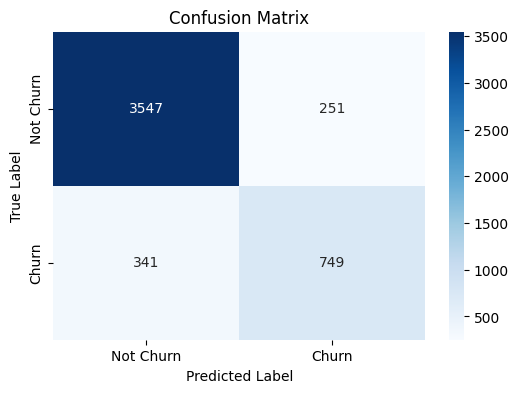

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      3798
           1       0.75      0.69      0.72      1090

    accuracy                           0.88      4888
   macro avg       0.83      0.81      0.82      4888
weighted avg       0.88      0.88      0.88      4888



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best saved model
best_model = tf.keras.models.load_model("saved_models/best_model.h5")

# Make predictions on the test set
y_pred_probs = best_model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary labels

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))